In [1]:
import os
import sys
import warnings

import pandas as pd

sys.path.append("..")

from src.pickle_manager import open_pickle
from src.evaluation import evaluate_model

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
from sklearn.decomposition import PCA
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

import umap
import umap.plot

/opt/conda/envs/stat_env/lib/python3.11/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [3]:
rf = open_pickle(os.path.join("..", "data", "models"), "rf_classifier_2.pkl")
lr = open_pickle(os.path.join("..", "data", "models"), "log_reg_2.pkl")
xgb = open_pickle(os.path.join("..", "data", "models"), "xgb_classifier_2.pkl")

data = open_pickle(os.path.join("..", "data", "pkls"), "processed_dataset_classification_2.pkl")
X_train, X_test, y_train, y_test = (
    data[0],
    data[1],
    data[2],
    data[3],
)

Classification Report for Logistic Regression (Train):
              precision    recall  f1-score   support

           0     0.4596    0.5568    0.5035    714863
           1     0.4150    0.3550    0.3827    890404
           2     0.4468    0.4691    0.4577    990767
           3     0.7313    0.6968    0.7136   1098642
           4     0.9140    0.8899    0.9018    771315

    accuracy                         0.5891   4465991
   macro avg     0.5933    0.5935    0.5919   4465991
weighted avg     0.5932    0.5891    0.5897   4465991

Classification Report for Logistic Regression (Test):
              precision    recall  f1-score   support

           0     0.4596    0.5562    0.5033    178716
           1     0.4152    0.3556    0.3831    222601
           2     0.4480    0.4701    0.4588    247692
           3     0.7309    0.6977    0.7139    274661
           4     0.9137    0.8884    0.9009    192828

    accuracy                         0.5893   1116498
   macro avg     0.593

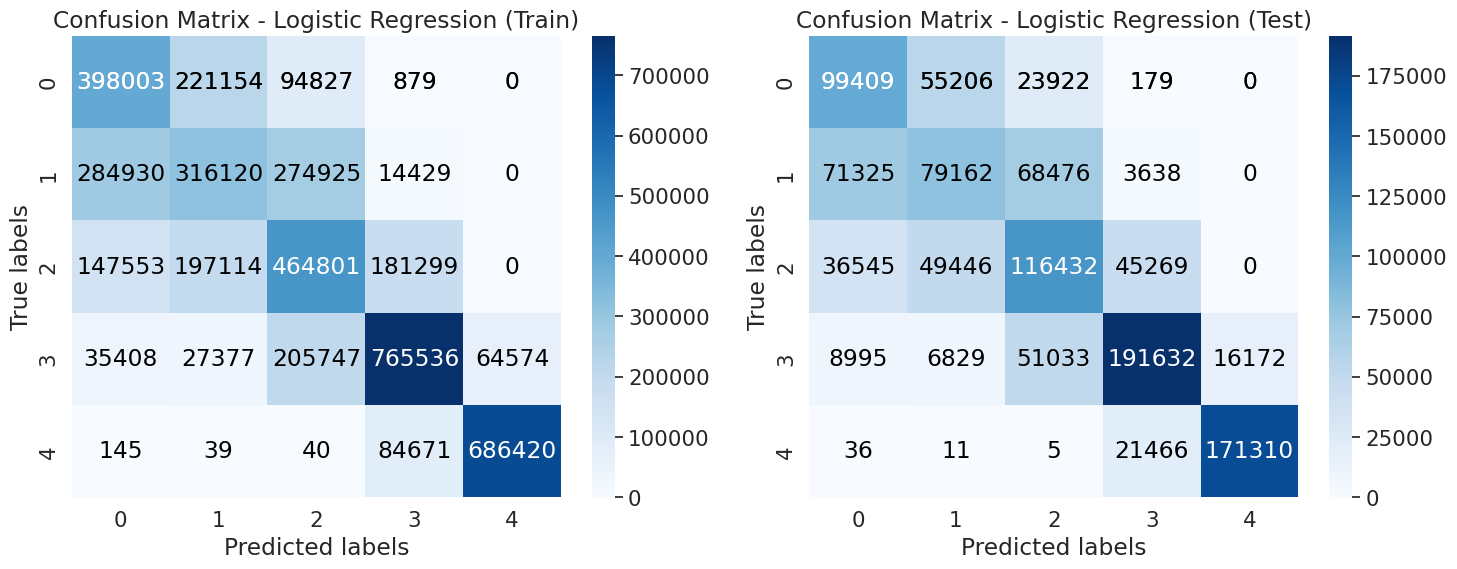

Classification Report for Random Forest (Train):
              precision    recall  f1-score   support

           0     0.4646    0.5798    0.5159    714863
           1     0.4275    0.4194    0.4234    890404
           2     0.4852    0.4791    0.4821    990767
           3     0.7653    0.6797    0.7200   1098642
           4     0.9210    0.8911    0.9058    771315

    accuracy                         0.6038   4465991
   macro avg     0.6127    0.6098    0.6094   4465991
weighted avg     0.6146    0.6038    0.6075   4465991

Classification Report for Random Forest (Test):
              precision    recall  f1-score   support

           0     0.4594    0.5736    0.5102    178716
           1     0.4202    0.4120    0.4161    222601
           2     0.4811    0.4741    0.4776    247692
           3     0.7611    0.6784    0.7174    274661
           4     0.9196    0.8880    0.9035    192828

    accuracy                         0.5994   1116498
   macro avg     0.6083    0.6052 

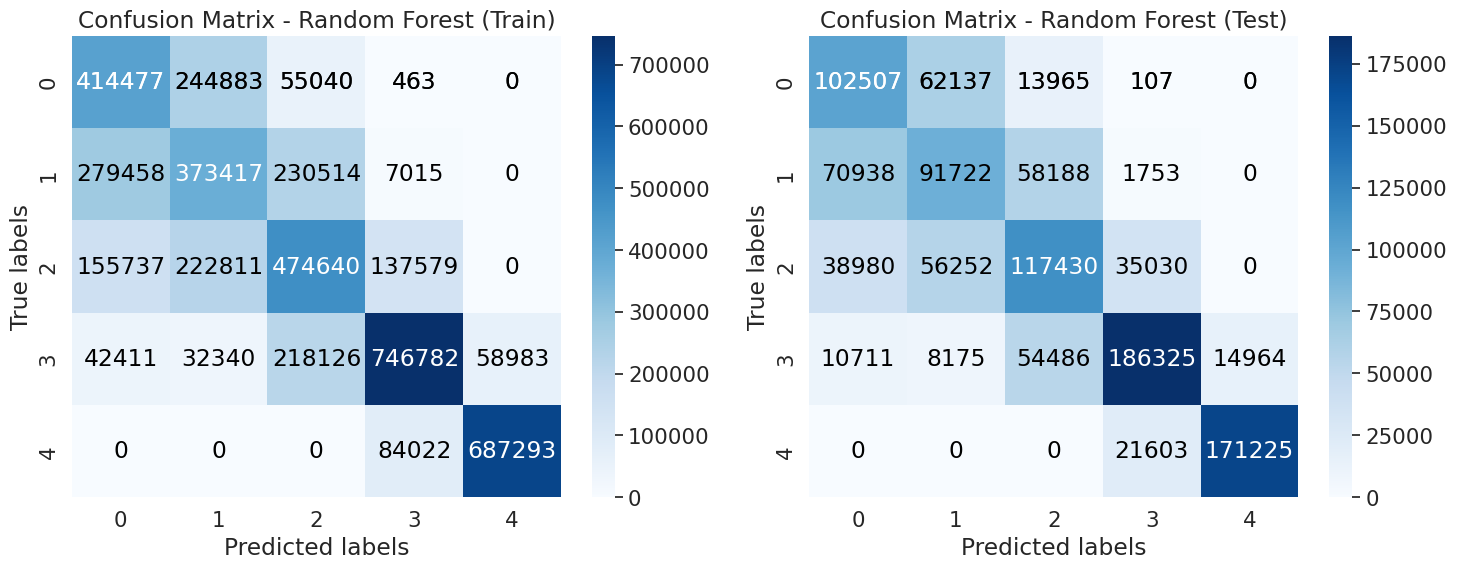

Classification Report for XGBoost (Train):
              precision    recall  f1-score   support

           0     0.4599    0.6497    0.5386    714863
           1     0.4327    0.4022    0.4169    890404
           2     0.5080    0.4818    0.4945    990767
           3     0.7773    0.6635    0.7159   1098642
           4     0.9183    0.8943    0.9061    771315

    accuracy                         0.6087   4465991
   macro avg     0.6192    0.6183    0.6144   4465991
weighted avg     0.6224    0.6087    0.6116   4465991

Classification Report for XGBoost (Test):
              precision    recall  f1-score   support

           0     0.4534    0.6404    0.5309    178716
           1     0.4231    0.3935    0.4077    222601
           2     0.5035    0.4763    0.4895    247692
           3     0.7724    0.6616    0.7127    274661
           4     0.9171    0.8915    0.9041    192828

    accuracy                         0.6033   1116498
   macro avg     0.6139    0.6127    0.6090   

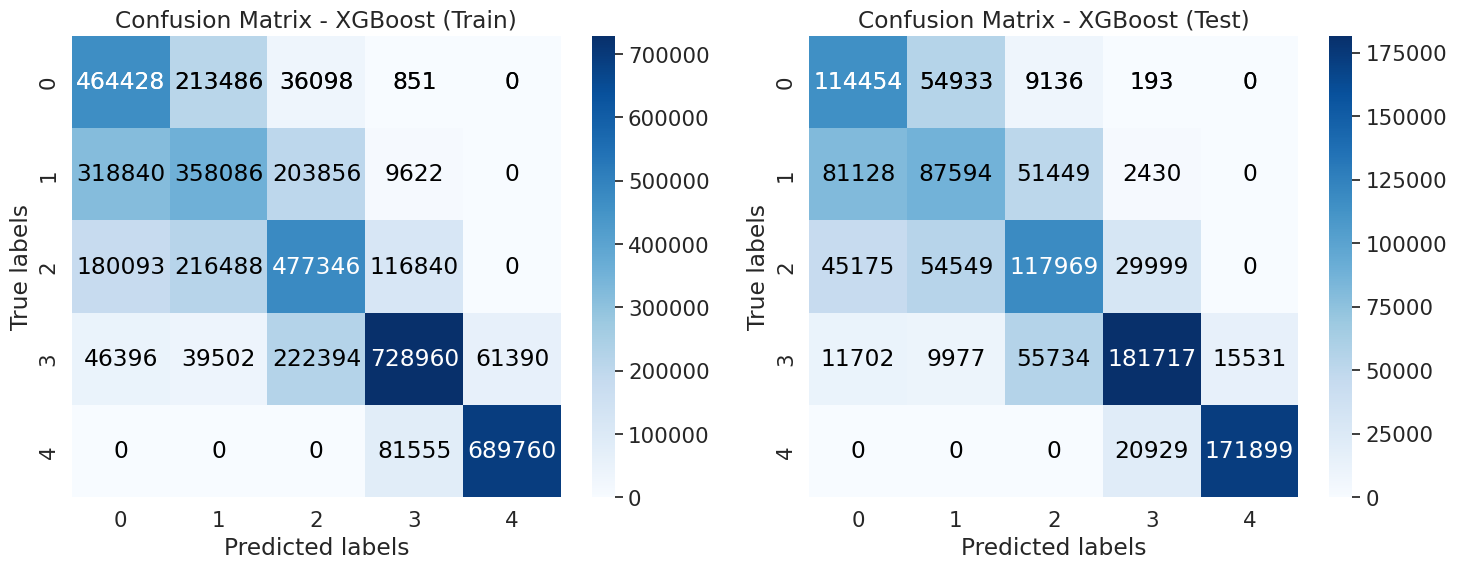

In [4]:
# Evaluate each model
for model, name in zip(
    [lr, rf, xgb], ["Logistic Regression", "Random Forest", "XGBoost"]
):
    evaluate_model(model, X_train, y_train, X_test, y_test, name)

## PCA, t-SNE & UMAP

In [5]:
# X = pd.concat([X_train, X_test], axis=0)
# y = np.concatenate([y_train, y_test], axis=0)

In [6]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test, y_test)

# Convert to data frame
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

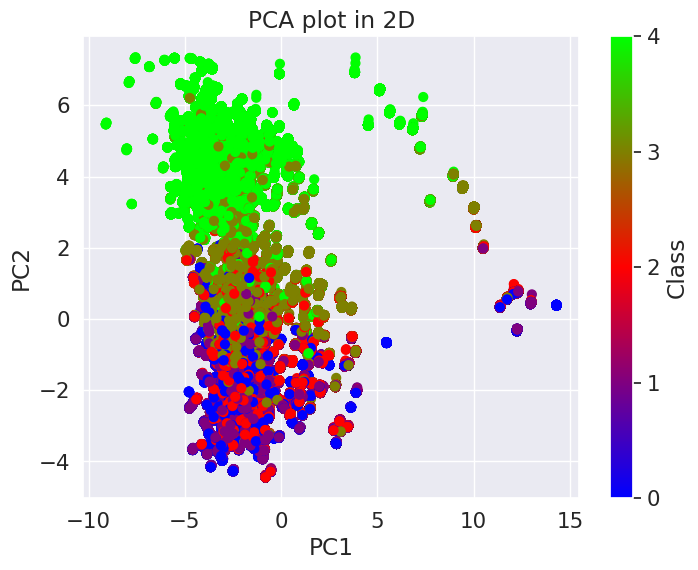

In [7]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=y_test, cmap="brg", s=40, vmin=0, vmax=4,)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar(label='Class', ticks=[0, 1, 2, 3, 4])

In [8]:
# UMAP
um = umap.UMAP()
X_umap = um.fit_transform(X_test)

# Convert to data frame
umap_df = pd.DataFrame(data = X_umap, columns = ['umap comp. 1', 'umap comp. 2'])

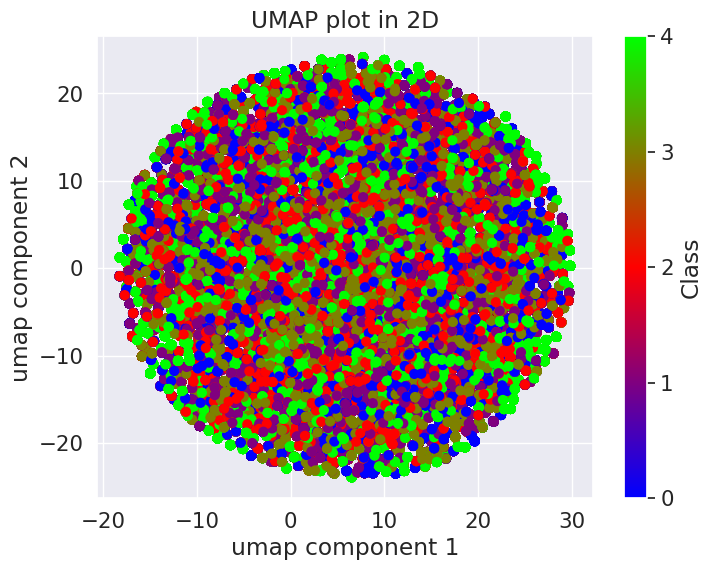

In [9]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], c=y_test, cmap="brg", s=40, vmin=0, vmax=4,)

# Aesthetics
plt.title('UMAP plot in 2D')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')
cbar = plt.colorbar(label='Class', ticks=[0, 1, 2, 3, 4])